In [310]:
import pandas as pd
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 21)
import matplotlib.pyplot as plt

In [311]:
dados = pd.read_csv('C:/Users/gubon/DidaticaTech/kc_house_data.csv')

In [312]:
#Mostra o Dataframe
dados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [313]:
#Excluindo  features irrelevantes
colunas_para_deletar = ['id', 'date', 'zipcode', 'long']
dados.drop(columns=colunas_para_deletar, inplace=True)

In [314]:
#Editando nome das colunas para o Português
dados = dados.rename(columns={
    'price': 'preco',
    'sqft_living': 'tamanho_casa',
    'bedrooms': 'quartos',
    'bathrooms': 'banheiros',
    'floors': 'andares',
    'condition': 'condicao',
    'yr_built': 'ano_construcao',
    'yr_renovated': 'ano_renovacao',
    'zipcode': 'cep',
    'sqft_lot': 'tamanho_terreno',
    'waterfront': 'beira-mar'
})

In [315]:
dados.columns

Index(['preco', 'quartos', 'banheiros', 'tamanho_casa', 'tamanho_terreno',
       'andares', 'beira-mar', 'view', 'condicao', 'grade', 'sqft_above',
       'sqft_basement', 'ano_construcao', 'ano_renovacao', 'lat',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [316]:
#Mostra o Dataframe
dados

,preco,quartos,banheiros,tamanho_casa,tamanho_terreno,andares,beira-mar,view,condicao,grade,sqft_above,sqft_basement,ano_construcao,ano_renovacao,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,1410,1287


In [317]:
#Definindo Variáveis preditoras e variável taget
x = dados.drop('preco', axis=1)
y = dados['preco']

In [318]:
#Separando os dados em treino e teste
#O '0.3' faz ele pegar 30% dos dados para treino e os outros 70% ficam para teste. 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)


In [319]:
#Dimenção do Dataframe
x_treino.shape

(15129, 16)

In [320]:
#Dimenção do Dataframe
y_treino.shape

(15129,)

In [321]:
#Dimenção do dataframe
x_teste.shape

(6484, 16)

In [322]:
#Dimenção do dataframe
y_teste.shape

(6484,)

In [323]:
#Criando o Modelo de Regreção 
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)
#X_treino é um dataframe do pandas que contem 70% dos dados do dataset 

LinearRegression()

In [324]:
#Avalia a precisão do modelo de regressão linear
resultado = modelo.score(x_teste, y_teste)
resultado

0.6849111056703827

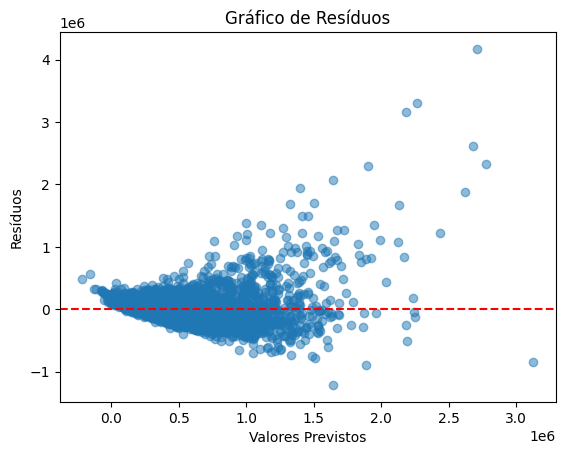

In [325]:
y_pred = modelo.predict(x_teste) #faz previsções com base em um conjunto de dados de teste. 

residuos = y_teste - y_pred #Os residuos estão sendo calculados.
plt.scatter(y_pred, residuos, alpha=0.5) #Criação de um grafico de dispersão, 'plota os dados nos graficos'
plt.axhline(y=0, color='r', linestyle='--') #Cria a linha.
plt.xlabel('Valores Previstos') #drescrição dos graficos.
plt.ylabel('Resíduos') #drescrição dos graficos.
plt.title('Gráfico de Resíduos') #drescrição dos graficos
plt.show() #Mostra o grafico
